In [2]:
#first experiment: XGBoost PhysicalChem Descriptors
import xgboost as xgb
import pickle
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#disable future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
with open('/localhome/cschiebroek/MDFP_VP/mdfptools/carl/liquid_phase_experiments/confirmed_liquids.pkl','rb') as f:
    liquids_molregnos = pickle.load(f)

def XGBOOST_random_splits(params, descriptors,):
    pred_list,ys_list,molregnos = [],[],[]
    for i in range(10):
        df_train = pd.read_csv('splits/OPERA_Naef_Training_condensed_'+str(i)+'.csv')
        df_val = pd.read_csv('splits/OPERA_Naef_Validation_condensed_'+str(i)+'.csv')
        df_train = df_train[df_train['molregno'].isin(liquids_molregnos)]
        df_val = df_val[df_val['molregno'].isin(liquids_molregnos)]

    
        train_X = df_train[descriptors]
        train_y = df_train['vp_log10_pa']
        val_X = df_val[descriptors]
        val_y = df_val['vp_log10_pa']
        dtrain = xgb.DMatrix(train_X, label=train_y)
        dval = xgb.DMatrix(val_X, label=val_y)
        model = xgb.train(
            params,
            dtrain,
            num_boost_round=999,
            verbose_eval=False
        )
        preds = model.predict(dval)
        rmse = mean_squared_error(val_y, preds, squared=False)
        pred_list.append(preds)
        ys_list.append(val_y)
        molregnos.append(df_val['molregno'])
        print(f"Split {i + 1}: RMSE = {rmse}")
    return pred_list, ys_list, molregnos
  



In [3]:
params = { #hyperparameters optimized by Working Wang
    'max_depth':5,
    'min_child_weight': 5,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
}
from rdkit.Chem import Descriptors
RDKit_feature_names = list(Descriptors.descList)
RDKit_feature_names = [i[0] for i in RDKit_feature_names]   
pred_list_xgboost_physchem, ys_list_xgboost_physchem, molregnos_xgboost_physchem = XGBOOST_random_splits(params, RDKit_feature_names)

Split 1: RMSE = 0.46219128309764035
Split 2: RMSE = 0.48101547541436906
Split 3: RMSE = 0.5828101634449806
Split 4: RMSE = 0.5524891261929848
Split 5: RMSE = 0.4868508308527251
Split 6: RMSE = 0.5871997903636594
Split 7: RMSE = 0.4556547382197274
Split 8: RMSE = 0.3960541718995952
Split 9: RMSE = 0.6045150877734097
Split 10: RMSE = 0.5904530710258924


In [4]:
mdfp_features_all = ['NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP', 'NumS', 'NumCl', 'NumBr', 'NumI',
                     'water_intra_crf_mean', 'water_intra_crf_std', 'water_intra_crf_median', 'water_intra_lj_mean',
                     'water_intra_lj_std', 'water_intra_lj_median', 'water_total_crf_mean', 'water_total_crf_std',
                     'water_total_crf_median', 'water_total_lj_mean', 'water_total_lj_std', 'water_total_lj_median',
                     'water_intra_ene_mean', 'water_intra_ene_std', 'water_intra_ene_median', 'water_total_ene_mean',
                     'water_total_ene_std', 'water_total_ene_median', 'water_rgyr_mean', 'water_rgyr_std',
                     'water_rgyr_median', 'water_sasa_mean', 'water_sasa_std', 'water_sasa_median']
pred_list_xgboost_mdfp_plus, ys_list_xgboost_mdfp_plus, molregnos_xgboost_mdfp_plus = XGBOOST_random_splits(params, mdfp_features_all)

Split 1: RMSE = 0.6129271678402427
Split 2: RMSE = 0.7913978768494997
Split 3: RMSE = 0.6487620053143472
Split 4: RMSE = 0.696798143772235
Split 5: RMSE = 0.6210683034577283
Split 6: RMSE = 0.6562183866279654
Split 7: RMSE = 0.5751383743922962
Split 8: RMSE = 0.6012234076419556
Split 9: RMSE = 0.6810095898548246
Split 10: RMSE = 0.6168758962860443


In [5]:
mdfp_features_sim_only = ['water_intra_crf_mean', 'water_intra_crf_std', 'water_intra_crf_median', 'water_intra_lj_mean',
                     'water_intra_lj_std', 'water_intra_lj_median', 'water_total_crf_mean', 'water_total_crf_std',
                     'water_total_crf_median', 'water_total_lj_mean', 'water_total_lj_std', 'water_total_lj_median',
                     'water_intra_ene_mean', 'water_intra_ene_std', 'water_intra_ene_median', 'water_total_ene_mean',
                     'water_total_ene_std', 'water_total_ene_median', 'water_rgyr_mean', 'water_rgyr_std',
                     'water_rgyr_median', 'water_sasa_mean', 'water_sasa_std', 'water_sasa_median']
pred_list_xgboost_mdfp_and_physchem, ys_list_xgboost_mdfp_and_physchem, molregnos_xgboost_mdfp_and_physchem = XGBOOST_random_splits(params, mdfp_features_sim_only + list(RDKit_feature_names))

Split 1: RMSE = 0.5142631422169363
Split 2: RMSE = 0.5873295774426471
Split 3: RMSE = 0.54410233563856
Split 4: RMSE = 0.5388576767732599
Split 5: RMSE = 0.4958321245038639
Split 6: RMSE = 0.5763518918673383
Split 7: RMSE = 0.43717016584984164
Split 8: RMSE = 0.5011813994894231
Split 9: RMSE = 0.5298875552763497
Split 10: RMSE = 0.5498301278893163


In [6]:
features_2d_counts = [f for f in mdfp_features_all if f not in mdfp_features_sim_only]
pred_list_xgboost_mdfp_counts, ys_list_xgboost_mdfp_counts, molregnos_xgboost_mdfp_counts = XGBOOST_random_splits(params, features_2d_counts)

Split 1: RMSE = 0.8722435264347709
Split 2: RMSE = 0.9439044491447267
Split 3: RMSE = 0.8647787139576476
Split 4: RMSE = 0.8887907736111281
Split 5: RMSE = 0.8836867276522876
Split 6: RMSE = 0.961254279917713
Split 7: RMSE = 0.8187102580849164
Split 8: RMSE = 0.775290736462336
Split 9: RMSE = 1.0694904619183119
Split 10: RMSE = 0.9844185714401141


In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
import scipy.stats as stats

def getStatValues_v2(x,y,treshold=1):
    RMSE = mean_squared_error(np.array(x), np.array(y), squared=False)
    MAE = mean_absolute_error(np.array(x), np.array(y))
    EBO = np.mean(np.abs(np.array(x) - np.array(y)) < treshold)
    KT = stats.kendalltau(x, y)[0]
    median_AE = median_absolute_error(np.array(x), np.array(y))

    return RMSE, MAE, EBO, KT, median_AE

def density_plot_multiple_custom_local(reals_list, predictions_list, molregnos_list, print_stats=True, bounds=None, title=None, print_spearman=False, name=None, dims = (1, 3)):
    # fig, axes = plt.subplots(1, len(reals_list), figsize=(10 * len(reals_list), 8))
    #assert that len(reals_list) is smaller then the number of subplots
    assert len(reals_list) <= dims[0]*dims[1]
    fig, axes = plt.subplots(dims[0], dims[1], figsize=(10 * dims[1], 8 * dims[0]))
    axes = axes.flatten()
    for i, (reals, predictions, molregnos) in enumerate(zip(reals_list, predictions_list, molregnos_list)):
        ax = axes[i] if len(reals_list) > 1 else axes


    # for i, (reals, predictions, molregnos) in enumerate(zip(reals_list, predictions_list, molregnos_list)):
    #     ax = axes[i] if len(reals_list) > 1 else axes

        rmses, maes, ebos, kts, median_aes = [], [], [], [], []

        for r, p in zip(reals, predictions):
            RMSE, MAE, EBO, KT, median_AE = getStatValues_v2(r, p)
            rmses.append(RMSE)
            maes.append(MAE)
            ebos.append(EBO)
            kts.append(KT)
            median_aes.append(median_AE)

        rmse_90_low, rmse_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(rmses), scale=stats.sem(rmses))
        rmse_mean = np.mean(rmses)
        mae_90_low, mae_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(maes), scale=stats.sem(maes))
        mae_mean = np.mean(maes)
        ebo_90_low, ebo_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(ebos), scale=stats.sem(ebos))
        ebo_mean = np.mean(ebos)
        kt_90_low, kt_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(kts), scale=stats.sem(kts))
        kt_mean = np.mean(kts)
        median_AE_90_low, median_AE_90_high = stats.norm.interval(confidence=0.90, loc=np.mean(median_aes), scale=stats.sem(median_aes))
        median_AE_mean = np.mean(median_aes)

        mrn = [item for sublist in molregnos for item in sublist]
        real = [item for sublist in reals for item in sublist]
        prediction = [item for sublist in predictions for item in sublist]

        df = pd.DataFrame({'molregno': mrn, 'real': real, 'prediction': prediction})
        df = df.groupby('molregno').mean()
        real = df['real'].tolist()
        prediction = df['prediction'].tolist()

        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real), max(prediction + real)], 'k-')
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) - 1, max(prediction + real) - 1], 'k--')
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) + 1, max(prediction + real) + 1], 'k--')

        dens_u = sm.nonparametric.KDEMultivariate(data=[real, prediction], var_type='cc', bw='normal_reference')
        z = dens_u.pdf([real, prediction])

        sc = ax.scatter(real, prediction, lw=0, c=z, s=10, alpha=0.9)

        ax.set_xlabel(r'Exp. VP (log10 Pa)', fontsize=14)
        ax.set_ylabel(r'Predicted VP (log10 Pa)', fontsize=14)
        ax.grid(True, which="both")

        if bounds is None:
            lower = min(prediction + real) - 2
            upper = max(prediction + real) + 2
        else:
            lower = bounds[0]
            upper = bounds[1]

        ax.axis([lower, upper, lower, upper])

        text_box = ax.text(0.05, 0.95, f'RMSE: {rmse_mean:.2f} ({rmse_90_low:.2f}-{rmse_90_high:.2f}) \nMedian AE: {median_AE_mean:.2f} ({median_AE_90_low:.2f}-{median_AE_90_high:.2f})\nMean AE: {mae_mean:.2f} ({mae_90_low:.2f}-{mae_90_high:.2f})\nFraction errors < 1: {ebo_mean:.2f} ({ebo_90_low:.2f}-{ebo_90_high:.2f})\nKendalls Tau: {kt_mean:.2f} ({kt_90_low:.2f}-{kt_90_high:.2f})',
                           transform=ax.transAxes, fontsize=12, verticalalignment='top',
                           bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

        if title is not None:
            ax.set_title(title[i] if len(reals_list) > 1 else title, fontsize=14)

        ax.set_aspect('equal', 'box')

    if name:
        plt.savefig(f'{name}.png', dpi=800, bbox_inches='tight')
    else:
        plt.show()


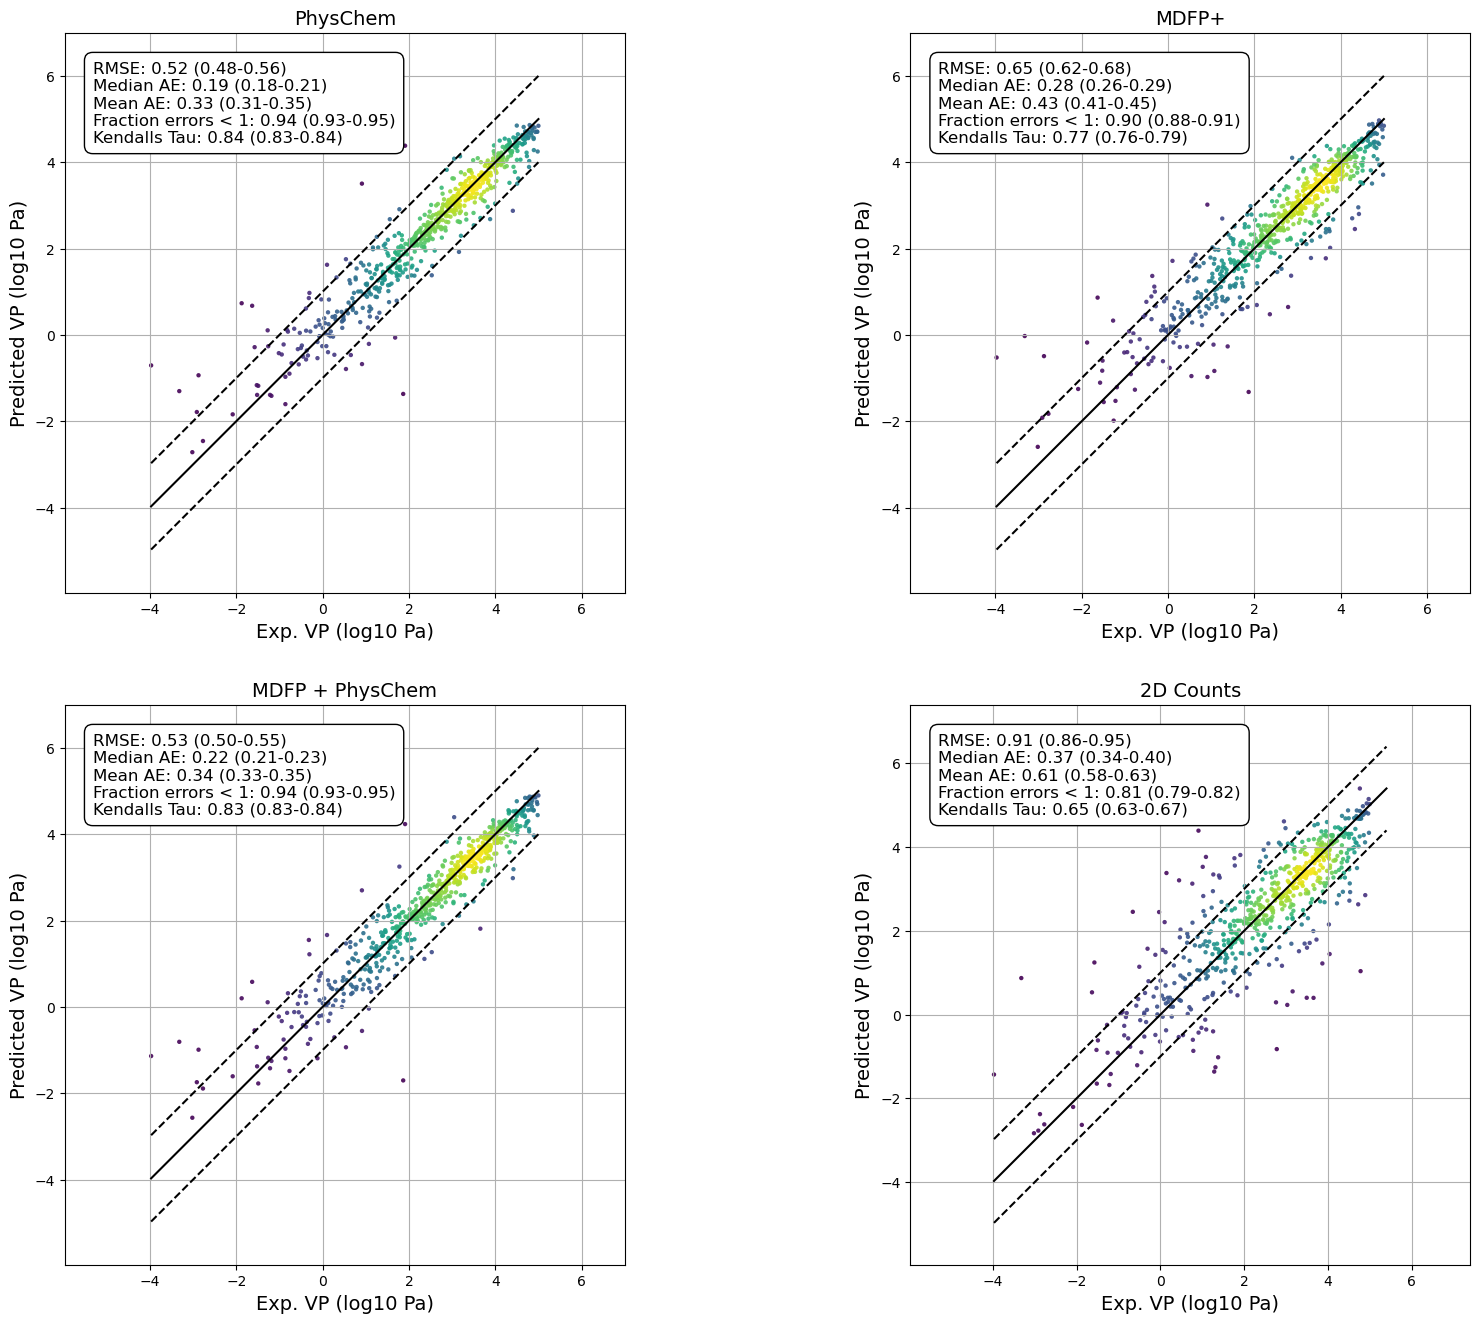

In [8]:
reals_list = [ys_list_xgboost_physchem, ys_list_xgboost_mdfp_plus, ys_list_xgboost_mdfp_and_physchem, ys_list_xgboost_mdfp_counts]
predictions_list = [pred_list_xgboost_physchem, pred_list_xgboost_mdfp_plus, pred_list_xgboost_mdfp_and_physchem, pred_list_xgboost_mdfp_counts]
molregnos_list = [molregnos_xgboost_physchem, molregnos_xgboost_mdfp_plus, molregnos_xgboost_mdfp_plus, molregnos_xgboost_mdfp_counts]
title = ['PhysChem', 'MDFP+', 'MDFP + PhysChem', '2D Counts']
density_plot_multiple_custom_local(reals_list, predictions_list, molregnos_list, title=title, name='XGBoost_MDFP_PhysChem_2DCounts', dims=(2,2))

In [9]:
mdfp_features_liquid = ['NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP', 'NumS', 'NumCl', 'NumBr', 'NumI',
 'liquid_intra_crf_mean',
 'liquid_intra_crf_std',
 'liquid_intra_crf_median',
 'liquid_intra_lj_mean',
 'liquid_intra_lj_std',
 'liquid_intra_lj_median',
 'liquid_total_crf_mean',
 'liquid_total_crf_std',
 'liquid_total_crf_median',
 'liquid_total_lj_mean',
 'liquid_total_lj_std',
 'liquid_total_lj_median',
 'liquid_intra_ene_mean',
 'liquid_intra_ene_std',
 'liquid_intra_ene_median',
 'liquid_total_ene_mean',
 'liquid_total_ene_std',
 'liquid_total_ene_median',
 'liquid_rgyr_mean',
 'liquid_rgyr_std',
 'liquid_rgyr_median',
 'liquid_sasa_mean',
 'liquid_sasa_std',
 'liquid_sasa_median',
 'liquid_dipole_magnitude_mean',
 'liquid_dipole_magnitude_std',
 'liquid_dipole_magnitude_median']

pred_list_xgboost_mdfp_liquid, ys_list_xgboost_mdfp_liquid, molregnos_xgboost_mdfp_liquid = XGBOOST_random_splits(params, mdfp_features_liquid)


Split 1: RMSE = 0.6644721172141925
Split 2: RMSE = 0.5854620595764659
Split 3: RMSE = 0.5285393198400057
Split 4: RMSE = 0.5044436586347032
Split 5: RMSE = 0.5541293448426207
Split 6: RMSE = 0.5821629228410078
Split 7: RMSE = 0.5236006585696291
Split 8: RMSE = 0.4098586758211325
Split 9: RMSE = 0.6245959883067297
Split 10: RMSE = 0.5992285375578058


Split 1: RMSE = 0.4918121661156387
Split 2: RMSE = 0.5033155660983586
Split 3: RMSE = 0.5009257853196772
Split 4: RMSE = 0.49254456312570283
Split 5: RMSE = 0.45252622713741975
Split 6: RMSE = 0.5105532351955882
Split 7: RMSE = 0.4651292011625745
Split 8: RMSE = 0.40563774079277437
Split 9: RMSE = 0.578028390823479
Split 10: RMSE = 0.5117468745359693


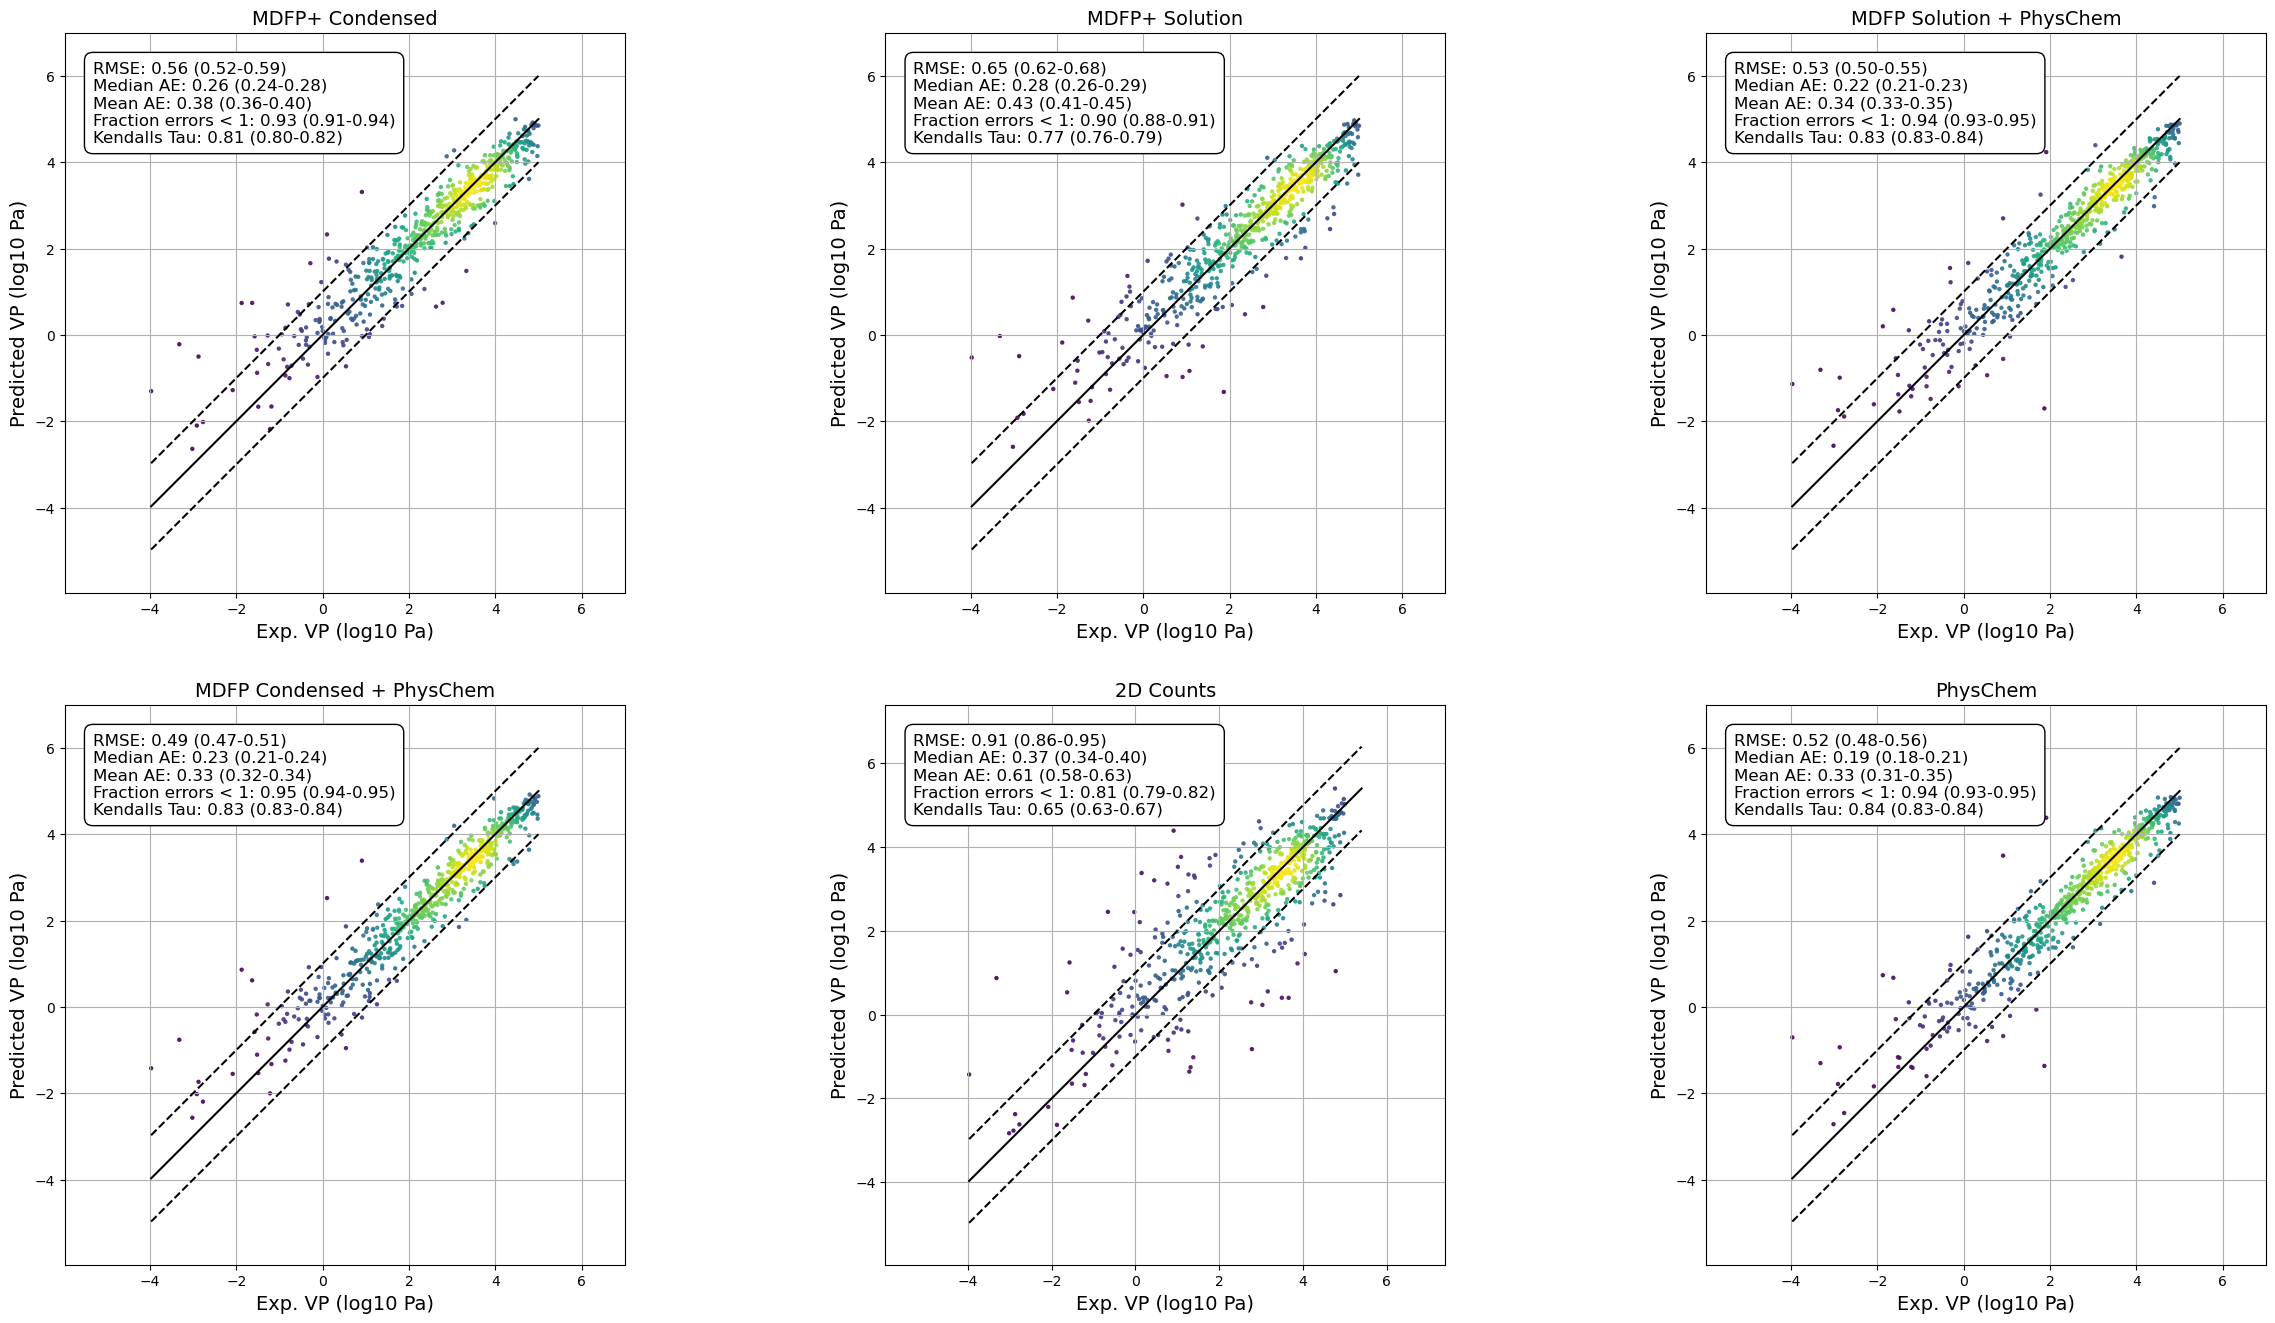

In [10]:
mdfp_features_liquid_sim_only = [
 'liquid_intra_crf_mean',
 'liquid_intra_crf_std',
 'liquid_intra_crf_median',
 'liquid_intra_lj_mean',
 'liquid_intra_lj_std',
 'liquid_intra_lj_median',
 'liquid_total_crf_mean',
 'liquid_total_crf_std',
 'liquid_total_crf_median',
 'liquid_total_lj_mean',
 'liquid_total_lj_std',
 'liquid_total_lj_median',
 'liquid_intra_ene_mean',
 'liquid_intra_ene_std',
 'liquid_intra_ene_median',
 'liquid_total_ene_mean',
 'liquid_total_ene_std',
 'liquid_total_ene_median',
 'liquid_rgyr_mean',
 'liquid_rgyr_std',
 'liquid_rgyr_median',
 'liquid_sasa_mean',
 'liquid_sasa_std',
 'liquid_sasa_median',
 'liquid_dipole_magnitude_mean',
 'liquid_dipole_magnitude_std',
 'liquid_dipole_magnitude_median']

pred_list_xgboost_mdfp_liquid_rdkit, ys_list_xgboost_mdfp_liquid_rdkit, molregnos_xgboost_mdfp_liquid_rdkit = XGBOOST_random_splits(params, mdfp_features_liquid_sim_only + list(RDKit_feature_names))

#plot all
reals_list = [ys_list_xgboost_mdfp_liquid, ys_list_xgboost_mdfp_plus, ys_list_xgboost_mdfp_and_physchem, ys_list_xgboost_mdfp_liquid_rdkit,ys_list_xgboost_mdfp_counts, ys_list_xgboost_physchem]
predictions_list = [pred_list_xgboost_mdfp_liquid, pred_list_xgboost_mdfp_plus, pred_list_xgboost_mdfp_and_physchem, pred_list_xgboost_mdfp_liquid_rdkit,pred_list_xgboost_mdfp_counts, pred_list_xgboost_physchem]
molregnos_list = [molregnos_xgboost_mdfp_liquid, molregnos_xgboost_mdfp_plus, molregnos_xgboost_mdfp_plus, molregnos_xgboost_mdfp_liquid_rdkit,molregnos_xgboost_mdfp_counts, molregnos_xgboost_physchem]
title = ['MDFP+ Condensed', 'MDFP+ Solution', 'MDFP Solution + PhysChem', 'MDFP Condensed + PhysChem', '2D Counts', 'PhysChem']
density_plot_multiple_custom_local(reals_list, predictions_list, molregnos_list, title=title, name='XGBoost_MDFP_PhysChem_2DCounts_Liquid', dims=(2,3))





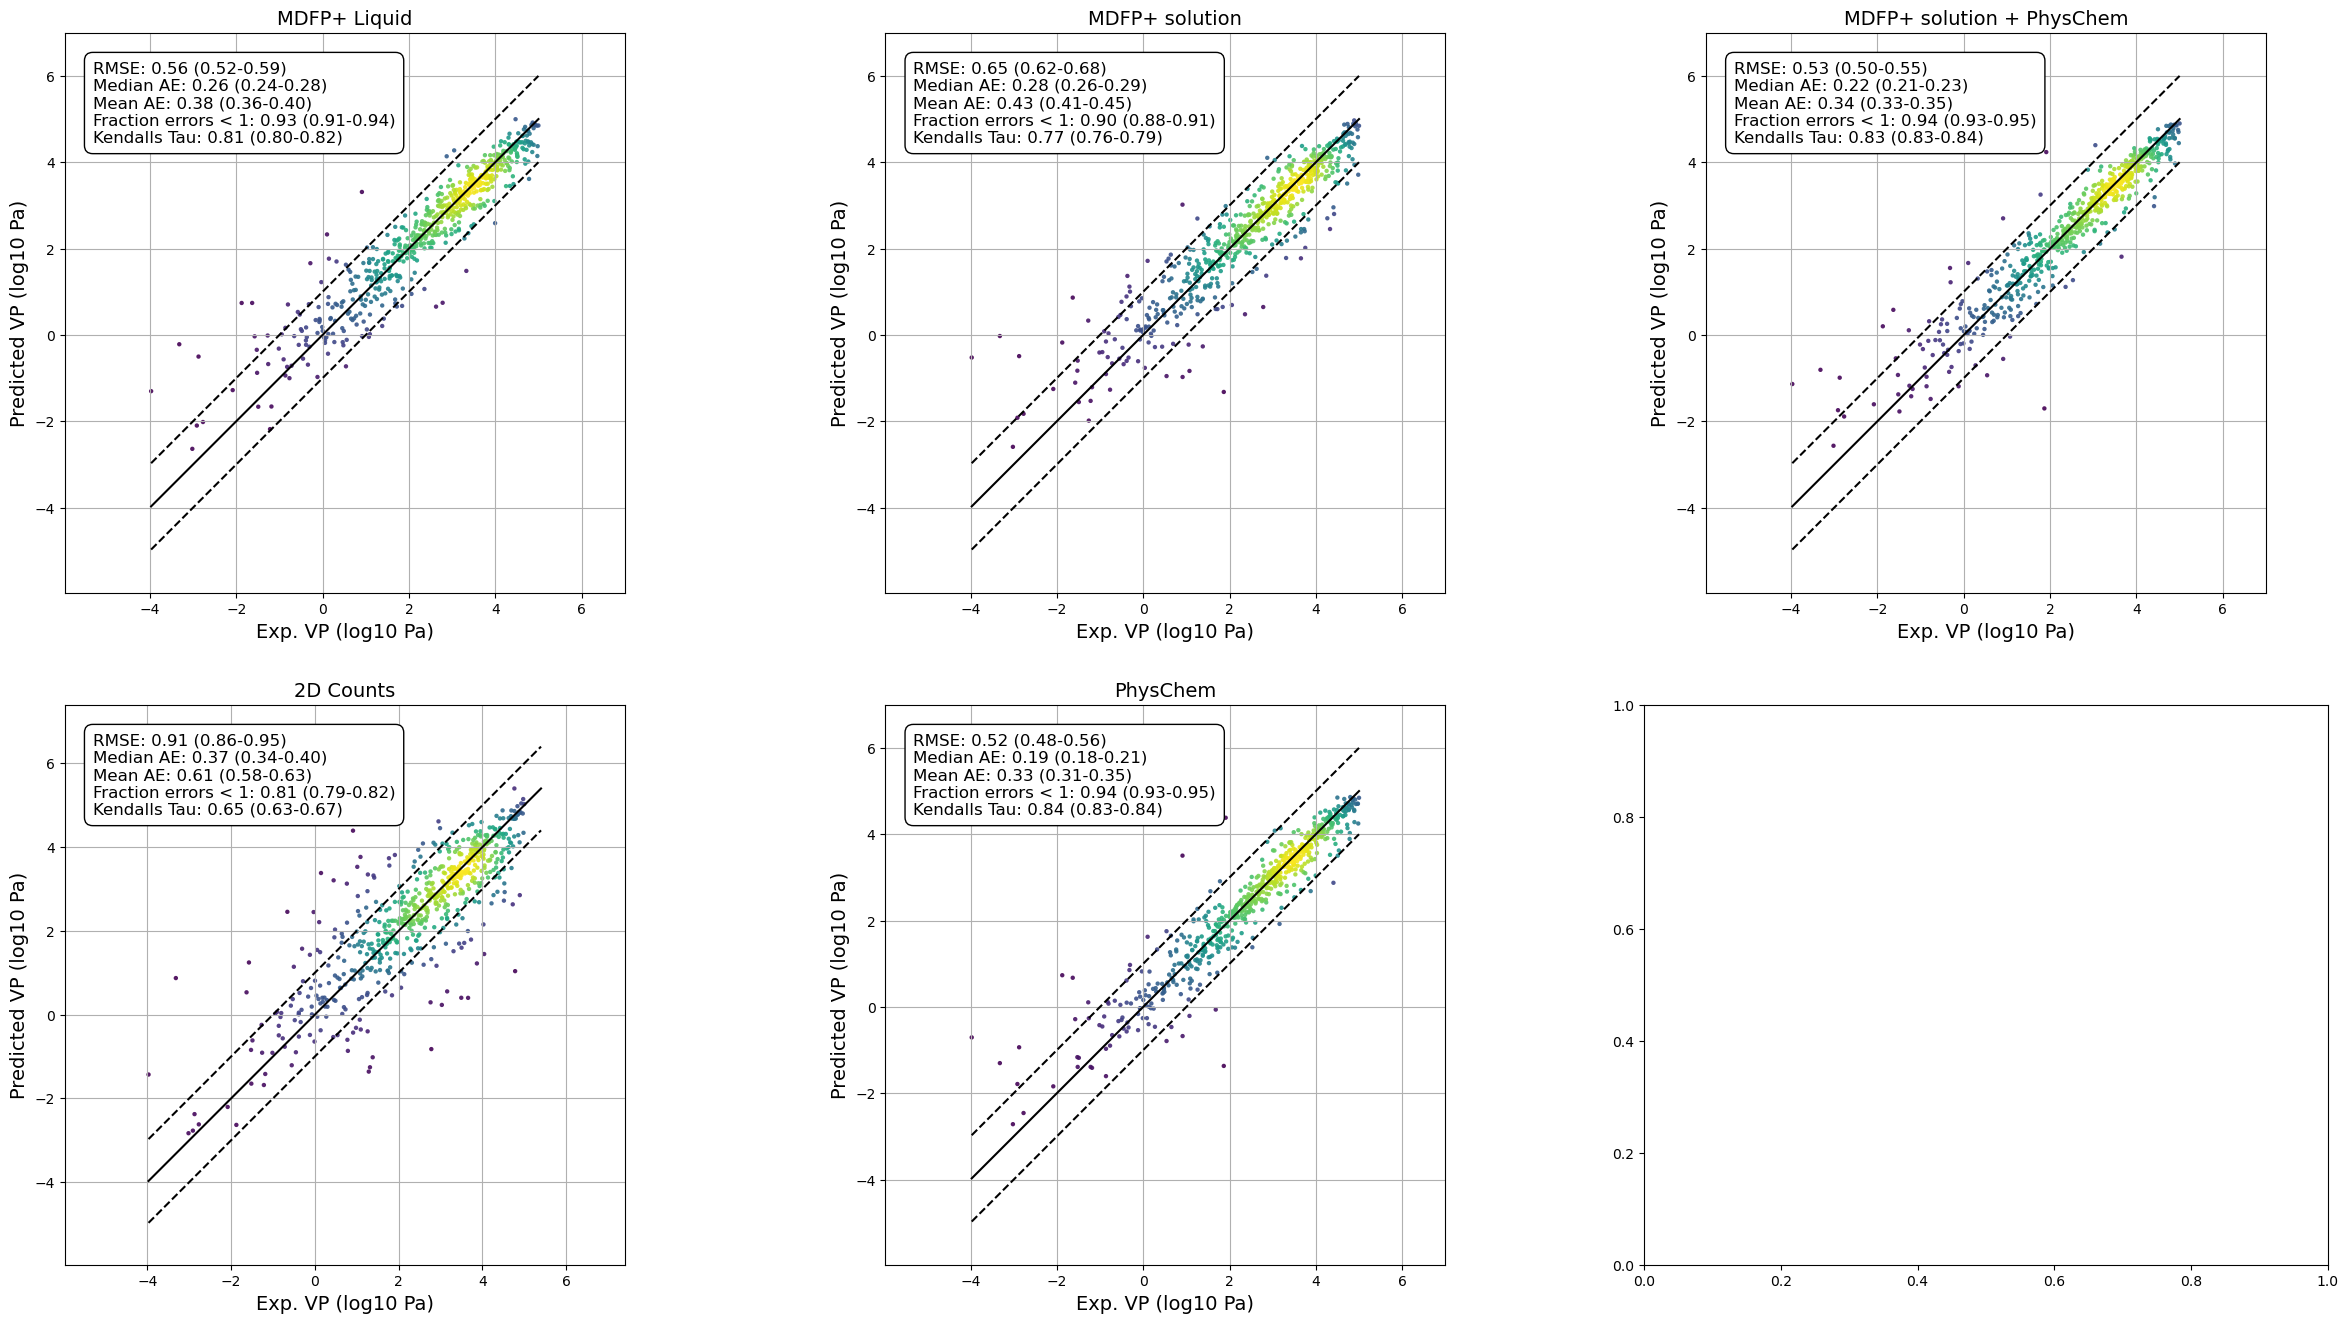

In [11]:
reals_list = [ys_list_xgboost_mdfp_liquid, ys_list_xgboost_mdfp_plus, ys_list_xgboost_mdfp_and_physchem, ys_list_xgboost_mdfp_counts, ys_list_xgboost_physchem]
predictions_list = [pred_list_xgboost_mdfp_liquid, pred_list_xgboost_mdfp_plus, pred_list_xgboost_mdfp_and_physchem, pred_list_xgboost_mdfp_counts, pred_list_xgboost_physchem]
molregnos_list = [molregnos_xgboost_mdfp_liquid, molregnos_xgboost_mdfp_plus, molregnos_xgboost_mdfp_plus, molregnos_xgboost_mdfp_counts, molregnos_xgboost_physchem]
title = ['MDFP+ Liquid', 'MDFP+ solution', 'MDFP+ solution + PhysChem', '2D Counts', 'PhysChem']
density_plot_multiple_custom_local(reals_list, predictions_list, molregnos_list, title=title, name='XGBoost_MDFP_PhysChem_2DCounts_Liquid', dims=(2,3))


In [12]:
#make df with all preds, calculate error for each descriptor, get subset with error > 1 for all methods
df_all = pd.DataFrame()
df_all['molregno'] = [item for sublist in molregnos_xgboost_physchem for item in sublist]
df_all['PhysChem'] = [item for sublist in pred_list_xgboost_physchem for item in sublist]
df_all['MDFP+'] = [item for sublist in pred_list_xgboost_mdfp_plus for item in sublist]
df_all['MDFP+PhysChem'] = [item for sublist in pred_list_xgboost_mdfp_and_physchem for item in sublist]
df_all['2DCounts'] = [item for sublist in pred_list_xgboost_mdfp_counts for item in sublist]
df_all['VP'] = [item for sublist in ys_list_xgboost_physchem for item in sublist]

df_all['PhysChem_error'] = abs(df_all['PhysChem'] - df_all['VP'])
df_all['MDFP+_error'] = abs(df_all['MDFP+'] - df_all['VP'])
df_all['MDFP+PhysChem_error'] = abs(df_all['MDFP+PhysChem'] - df_all['VP'])
df_all['2DCounts_error'] = abs(df_all['2DCounts'] - df_all['VP'])

df_error = df_all[(df_all['PhysChem_error'] > 1) & (df_all['MDFP+_error'] > 1) & (df_all['MDFP+PhysChem_error'] > 1) & (df_all['2DCounts_error'] > 1)]

#get smiles via /localhome/cschiebroek/MDFP_VP/mdfptools/carl/data_curation/cs_mdfps_schema_experimental_data.csv
df_exp_vals = pd.read_csv('/localhome/cschiebroek/MDFP_VP/mdfptools/carl/data_curation/cs_mdfps_schema_experimental_data.csv')
df_exp_vals = df_exp_vals[['molregno', 'smiles']]
df_exp_vals = df_exp_vals.drop_duplicates()
df_exp_vals = df_exp_vals.set_index('molregno')
df_error = df_error.set_index('molregno')

df_error = df_error.join(df_exp_vals)
df_error

,PhysChem,MDFP+,MDFP+PhysChem,2DCounts,VP,PhysChem_error,MDFP+_error,MDFP+PhysChem_error,2DCounts_error,smiles
molregno,,,,,,,,,,
259,0.972036,1.001946,1.218355,1.573629,-0.305699,1.277735,1.307645,1.524053,1.879327,CCCCCCCC(=O)O
412,-0.828594,-0.262417,-1.482796,0.007377,-2.874000,2.045406,2.611583,1.391204,2.881377,CCOP(=S)(OCC)Oc1ccc([N+](=O)[O-])cc1
723,-0.767356,-0.690457,-0.596145,-0.785232,0.912402,1.679758,1.602859,1.508547,1.697634,O=P(OCCCl)(OCCCl)OCCCl
2355,1.515099,1.294929,1.728795,1.945217,0.102202,1.412897,1.192727,1.626593,1.843015,O=C1CCCN1
2355,1.732904,2.134382,1.601080,2.471262,0.102202,1.630702,2.032181,1.498878,2.369060,O=C1CCCN1
2834,-1.466986,-0.568723,-1.044674,-0.043305,-3.319998,1.853012,2.751274,2.275324,3.276693,OCCN(CCO)CCO
2834,-1.137614,0.515123,-0.573196,1.788352,-3.319998,2.182383,3.835121,2.746801,5.108350,OCCN(CCO)CCO
2875,-1.635917,-2.394392,-2.150342,0.855401,1.866521,3.502438,4.260914,4.016863,1.011121,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)N(C(F)(F)C(F)(F)C...
2875,-0.913252,-1.337499,-1.490000,3.199673,1.866521,2.779773,3.204020,3.356521,1.333152,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)N(C(F)(F)C(F)(F)C...


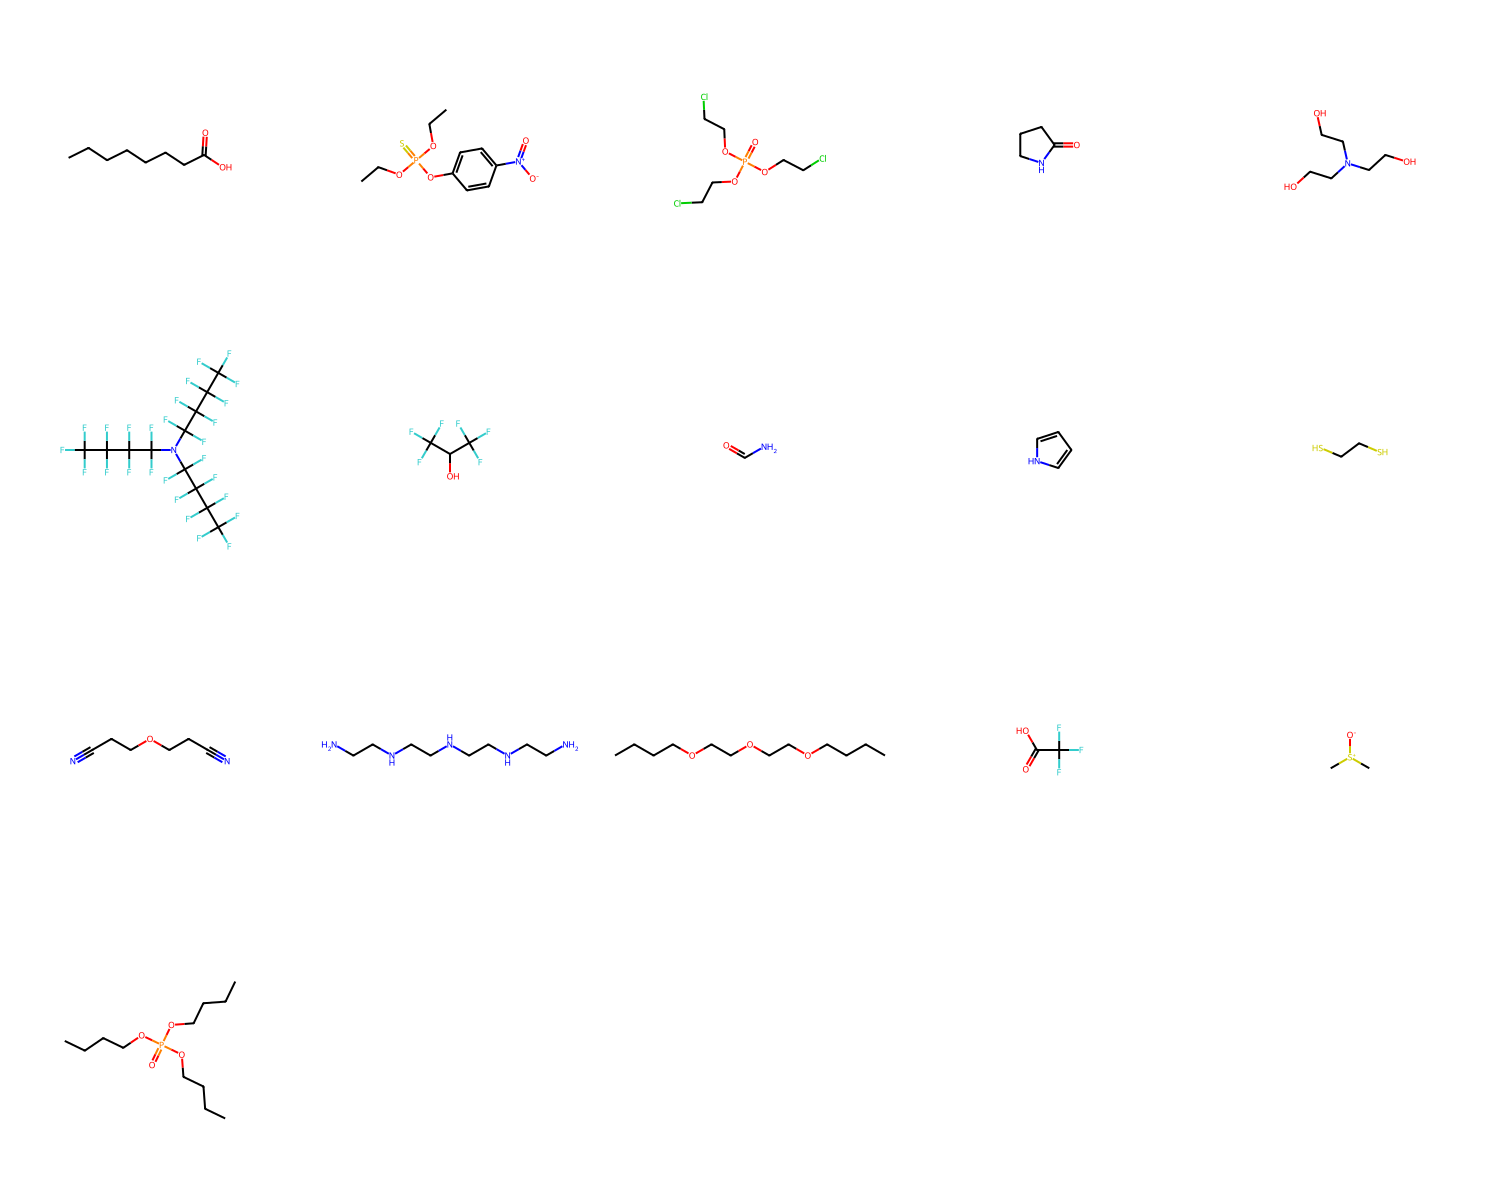

In [14]:
#draw
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

mols = [Chem.MolFromSmiles(smi) for smi in df_error['smiles'].unique()]
img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(300,300))
img